In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import SVD

In [3]:
ratings=pd.read_csv('ratings_small.csv')

In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
min(ratings['rating'])

0.5

In [7]:
max(ratings['rating'])

5.0

In [8]:
reader=Reader(rating_scale=(0.5,5))
dataset=Dataset.load_from_df(ratings[['userId','movieId','rating']],reader)

In [9]:
trainset, testset = train_test_split(dataset, test_size=0.25)

In [10]:
algo = SVD()

In [11]:
algo.fit(trainset)

In [12]:
predictions=algo.test(testset)
svd_cv_results = cross_validate(algo, dataset, measures=['RMSE'], cv=5, verbose=True)
print("\nSVD Cross-Validation Results:")
for key, value in svd_cv_results.items():
    print(f"{key}: {sum(value) / len(value)}")

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8960  0.8934  0.9027  0.8977  0.8964  0.8972  0.0031  
Fit time          0.48    0.50    0.49    0.47    0.48    0.49    0.01    
Test time         0.07    0.11    0.06    0.06    0.11    0.08    0.02    

SVD Cross-Validation Results:
test_rmse: 0.8972283281651908
fit_time: 0.4868904113769531
test_time: 0.08300838470458985


In [13]:
svd_cv_results = cross_validate(algo, dataset, measures=['MAE'], cv=5, verbose=True)
print("\nSVD Cross-Validation Results:")
for key, value in svd_cv_results.items():
    print(f"{key}: {sum(value) / len(value)}")

Evaluating MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6919  0.6892  0.6922  0.6956  0.6886  0.6915  0.0025  
Fit time          0.50    0.48    0.52    0.49    0.49    0.50    0.01    
Test time         0.06    0.11    0.06    0.06    0.12    0.08    0.03    

SVD Cross-Validation Results:
test_mae: 0.6914986464094436
fit_time: 0.49666290283203124
test_time: 0.08427362442016602


# User based collaborative filtering

In [14]:
from surprise import KNNBasic

# Use user-based collaborative filtering (KNNBasic with cosine similarity)
sim_options = {
    'name': 'cosine',
    'user_based': True
}

algo = KNNBasic(sim_options=sim_options,verbose=False)

# Train the model
algo.fit(trainset)

# Predict ratings for the test set
predictions = algo.test(testset)

# Evaluate the model's accuracy
user_cv_results = cross_validate(algo, dataset, measures=['RMSE'], cv=5, verbose=False)
print("\nUser based collaborative Cross-Validation Results:")
for key, value in user_cv_results.items():
    print(f"{key}: {sum(value) / len(value)}")

user_cv_results = cross_validate(algo, dataset, measures=['MAE'], cv=5, verbose=False)
print("\nUser based collaborative Cross-Validation Results:")
for key, value in user_cv_results.items():
    print(f"{key}: {sum(value) / len(value)}")


User based collaborative Cross-Validation Results:
test_rmse: 0.9941085549393295
fit_time: 0.07368698120117187
test_time: 0.8022275924682617

User based collaborative Cross-Validation Results:
test_mae: 0.7686037392402165
fit_time: 0.07203230857849122
test_time: 0.7696543216705323


In [15]:
# Use item-based collaborative filtering (KNNBasic with cosine similarity)
sim_options = {
    'name': 'cosine',
    'user_based': False
}

algo = KNNBasic(sim_options=sim_options,verbose=False)

# Train the model
algo.fit(trainset)

# Predict ratings for the test set
predictions = algo.test(testset)

# Evaluate the model's accuracy
item_cv_results = cross_validate(algo, dataset, measures=['RMSE'], cv=5, verbose=False)
print("\nItem based collaborative Cross-Validation Results:")
for key, value in item_cv_results.items():
    print(f"{key}: {sum(value) / len(value)}")

item_cv_results = cross_validate(algo, dataset, measures=['MAE'], cv=5, verbose=False)
print("\nItem based collaborative Cross-Validation Results:")
for key, value in item_cv_results.items():
    print(f"{key}: {sum(value) / len(value)}")


Item based collaborative Cross-Validation Results:
test_rmse: 0.9940347661791549
fit_time: 3.31239595413208
test_time: 3.361874294281006

Item based collaborative Cross-Validation Results:
test_mae: 0.774016679179739
fit_time: 3.3633928298950195
test_time: 3.359212303161621


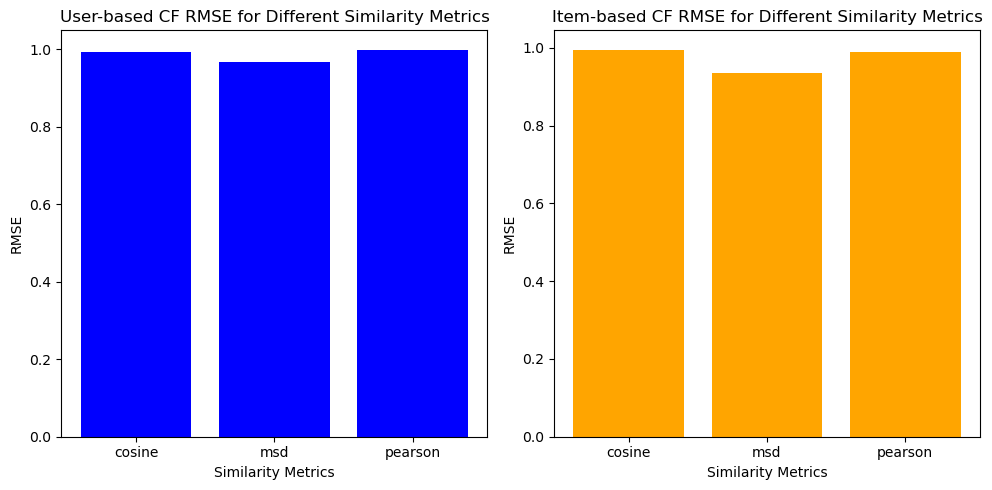

In [16]:
import matplotlib.pyplot as plt

similarity_metrics = ['cosine', 'msd', 'pearson']

user_results = {}
item_results = {}

for metric in similarity_metrics:
    # User-based CF
    sim_options_user = {
        'name': metric,
        'user_based': True
    }

    algo_user = KNNBasic(sim_options=sim_options_user,verbose=False)

    user_cv_results = cross_validate(algo_user, dataset, measures=['RMSE'], cv=5, verbose=False)
    user_results[metric] = sum(user_cv_results['test_rmse']) / len(user_cv_results['test_rmse'])

    # Item-based CF
    sim_options_item = {
        'name': metric,
        'user_based': False
    }

    algo_item = KNNBasic(sim_options=sim_options_item,verbose=False)

    item_cv_results = cross_validate(algo_item, dataset, measures=['RMSE'], cv=5, verbose=False)
    item_results[metric] = sum(item_cv_results['test_rmse']) / len(item_cv_results['test_rmse'])

# Plotting results
metrics = list(user_results.keys())
user_rmse = list(user_results.values())
item_rmse = list(item_results.values())

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(metrics, user_rmse, color='blue')
plt.title('User-based CF RMSE for Different Similarity Metrics')
plt.xlabel('Similarity Metrics')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.bar(metrics, item_rmse, color='orange')
plt.title('Item-based CF RMSE for Different Similarity Metrics')
plt.xlabel('Similarity Metrics')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

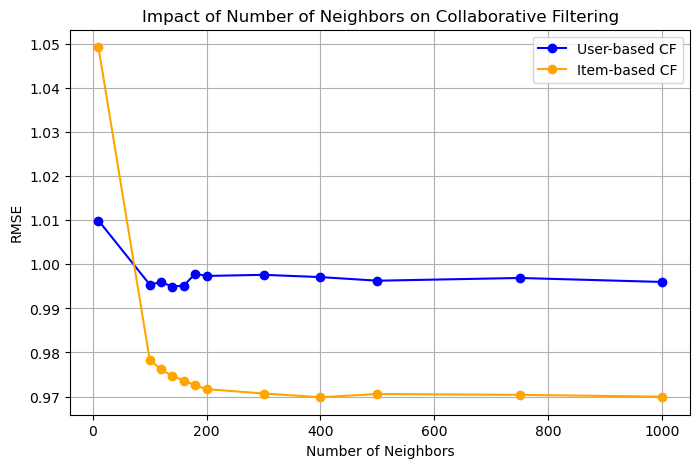

In [19]:
# Define a range of number of neighbors to test
num_neighbors_range = [10,100,120,140,160,180,200,300,400,500,750,1000]

user_results = []
item_results = []

for num_neighbors in num_neighbors_range:
    # User-based CF
    sim_options_user = {
        'name': 'cosine',
        'user_based': True
    }

    algo_user = KNNBasic(k=num_neighbors, sim_options=sim_options_user,verbose=False)

    user_cv_results = cross_validate(algo_user, dataset, measures=['RMSE'], cv=5, verbose=False)
    user_results.append(sum(user_cv_results['test_rmse']) / len(user_cv_results['test_rmse']))

    # Item-based CF
    sim_options_item = {
        'name': 'cosine',
        'user_based': False
    }

    algo_item = KNNBasic(k=num_neighbors, sim_options=sim_options_item,verbose=False)

    item_cv_results = cross_validate(algo_item, dataset, measures=['RMSE'], cv=5, verbose=False)
    item_results.append(sum(item_cv_results['test_rmse']) / len(item_cv_results['test_rmse']))

# Plotting results
plt.figure(figsize=(8, 5))

plt.plot(num_neighbors_range, user_results, marker='o', label='User-based CF', color='blue')
plt.plot(num_neighbors_range, item_results, marker='o', label='Item-based CF', color='orange')

plt.title('Impact of Number of Neighbors on Collaborative Filtering')
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()
